# Random Forest model for predicting the interval between dialysis access interventions #

*Project summary*

This analysis was performed based on a consulting project to estimate the length of time it takes dialysis access patients to develop complications that would necessitate another dialysis access procedure. The dataset was obtained from a dialysis access facility with entries depicting variables such as the interval between Dialysis Access interventions (DAI), and procedure information for dialysis access patients. This information include data on the age of the patient, the type and subtypes of access procedures performed, whether or not the patient had complications such as narrowing of the blood vessels (stenosis), and amount of anaesthesia used to name a few.

The analysis entailed data cleaning, requiring removing columns of data with only missing values, duplicated data and those indicating payment codes. I also had to remove special characters such as double quotes from the row entries, and ensure variables are of the correct data type. For example, I had to transform the age variable from character strings to numeric data type.

Subsequently, I performed data exploration, which showed the response variable- interval between dialysis access interventions to be skewed and depicting outlier values. So, I did a natural log transformation to take care of the assymmetry in the response variable. Then I used one-hot encoding to break up the individual classes within each categorical variable into seperate columns, and also used simple imputer to replace missing values in numeric predictor variables with the mean value for each column.

Finally, I used a Random Forest model to predict interval between dialysis access interventions. The value in such prediction is that dialysis access facilities/pysicians can schedule detailed clinical examination of the patient to detect complications before they become severe.

In [60]:
# Importing basic useful libraries
import pandas as pd
import numpy as np

In [61]:
# Loading the dataset
Dialysis = pd.read_csv('Dialysis_data.csv', encoding = 'unicode_escape')

In [62]:
# Eyeballing the data to see what it looks like
Dialysis.head()

,PatientID,SurgeonID,Days Until Next Intervention,Days Since last access procedure,Site of Service-4,patient age in years-7,Prolonged Bleeding (996.73-9,Follow up after Difficulty-10,Follow up after Difficulty-11,Swelling (729.81)-12,...,99155 - Moderate sedation -642,36905 - Percutaneous trans-643,77001- Fluoroscopic guidan-644,6100F-645,PQRS Codes-646,6100F-8P-647,4048F-648,4048F-8P-649,6045F-650,6045F-8P-651
0,TE1zaw/rjb/6RsoxKy36S6WMwoLTOu9OKZpYapmJqiU=,12,1626,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xmu3QwmWPcKVese+cOurfy5GnDZHUmAadTSfd+EuT7E=,11,1543,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6GB4V62mmxzrML4aLAo+G5R8LH3r6/W3DQcRINDwgIs=,7,1520,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5AFK3p9flAkGlozhHwBbRz6cp7lv/rp8uoUPmqI5Wc8=,7,1125,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"""1""",NaN,NaN,NaN,"""1""","""1""",NaN
4,wRuNb+s9BiJo6C09SDloV9K/6dPg5GJWTXQ4PZW2Wzo=,11,1121,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"""1""",NaN,NaN,NaN,"""1""","""1""",NaN


In [63]:
# Checking for details of the data, like number of rows and columns
Dialysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Columns: 646 entries, PatientID to 6045F-8P-651
dtypes: float64(207), int64(2), object(437)
memory usage: 11.9+ MB


In [64]:
# Obtaining columns with only missing values
K2 = Dialysis.isnull().sum().sort_values(ascending=False)
M2 = pd.DataFrame(K2, columns=['Number of NAs'])
M2.head(5)

,Number of NAs
brachialmid-248,2410
Follow up fistulagram-282,2410
Abnormality-79,2410
Procedure Information-82,2410
At least 1 arterial stent-515,2410


In [65]:
# Columns without NAs
No_NAs = M[0:6]
Cols_without_NAs = list(No_NAs.index.values)
Cols_without_NAs

['PatientID',
 'SurgeonID',
 'Days Until Next Intervention',
 'Extremity-41',
 'Ultrasound Guidance-88',
 'Thrombolysis-94']

In [66]:
# Dropping colums with only NAs
First_50 = M2[0:50]
Second_50 = M2[50:100]
Third_50 = M2[100:150]
Fourth_50 = M2[150:200]
Fifth_50 = M2[200:206]

First = list(First_50.index.values)
Second = list(Second_50.index.values)
Third = list(Third_50.index.values)
Fourth = list(Fourth_50.index.values)
Fifth = list(Fifth_50.index.values)

Dialysis.drop(First, axis=1, inplace=True)
Dialysis.drop(Second, axis=1, inplace=True)
Dialysis.drop(Third, axis=1, inplace=True)
Dialysis.drop(Fourth, axis=1, inplace=True)
Dialysis.drop(Fifth, axis=1, inplace=True)

In [67]:
# Checking to see what the data now looks like after dropping columns with only NA values
Dialysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Columns: 440 entries, PatientID to 6045F-8P-651
dtypes: float64(1), int64(2), object(437)
memory usage: 8.1+ MB


In [68]:
# Eyeballing the data
Dialysis.head()

,PatientID,SurgeonID,Days Until Next Intervention,Days Since last access procedure,Site of Service-4,patient age in years-7,Follow up after Difficulty-10,Status-20,Urgency-21,Patient on Hemodialysis?-22,...,99156 - Moderate sedation -639,99157 - Moderate sedation -640,36905 - Percutaneous trans-643,77001- Fluoroscopic guidan-644,6100F-645,6100F-8P-647,4048F-648,4048F-8P-649,6045F-650,6045F-8P-651
0,TE1zaw/rjb/6RsoxKy36S6WMwoLTOu9OKZpYapmJqiU=,12,1626,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xmu3QwmWPcKVese+cOurfy5GnDZHUmAadTSfd+EuT7E=,11,1543,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6GB4V62mmxzrML4aLAo+G5R8LH3r6/W3DQcRINDwgIs=,7,1520,NaN,"""Physician Office""",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5AFK3p9flAkGlozhHwBbRz6cp7lv/rp8uoUPmqI5Wc8=,7,1125,NaN,"""Physician Office""",NaN,NaN,"""Established""","""Elective""","""Yes""",...,NaN,NaN,NaN,NaN,"""1""",NaN,NaN,"""1""","""1""",NaN
4,wRuNb+s9BiJo6C09SDloV9K/6dPg5GJWTXQ4PZW2Wzo=,11,1121,NaN,"""Physician Office""",NaN,NaN,"""Established""","""Elective""","""Yes""",...,NaN,NaN,NaN,NaN,"""1""",NaN,NaN,"""1""","""1""",NaN


In [69]:
# Checking to see the data type for each variable
Dialysis.dtypes

PatientID                            object
SurgeonID                             int64
Days Until Next Intervention          int64
Days Since last access procedure    float64
Site of Service-4                    object
                                     ...   
6100F-8P-647                         object
4048F-648                            object
4048F-8P-649                         object
6045F-650                            object
6045F-8P-651                         object
Length: 440, dtype: object

In [70]:
# Changing the data type of SurgeonID to categorical variable
Dialysis['SurgeonID'] = Dialysis['SurgeonID'].astype(str) 

In [71]:
# Getting a list of column names
Column_names = list(Dialysis.columns)
Column_names

['PatientID',
 'SurgeonID',
 'Days Until Next Intervention',
 'Days Since last access procedure',
 'Site of Service-4',
 'patient age in years-7',
 'Follow up after Difficulty-10',
 'Status-20',
 'Urgency-21',
 'Patient on Hemodialysis?-22',
 'Prolonged Bleeding-25',
 'Swelling-26',
 'Inadequate Clearance-27',
 'Poor Arterial Inflow-28',
 'Aneurysmal Degeneration-29',
 'Pain-30',
 'Inadequate Maturation-31',
 'Clotted Access-32',
 'Ischemic steal syndrome-33',
 'Difficult Cannulation-34',
 'Other-35',
 'Type of most recent interv-36',
 'Stenosis-37',
 'High Venous Pressure-38',
 'Extremity-41',
 'Informed Consent (risks, b-42',
 'Time Out Performed: Correc-43',
 'Family Member-44',
 'side-45',
 'Anesthesia-46',
 'Access Type-47',
 'Access Type-48',
 'extremity type-49',
 'AV Fistula Type-50',
 'AV Graft Type-51',
 'Arterial Limb-52',
 'AV Graft Type-53',
 'Graft Configuration-54',
 'Hero Type-55',
 'Local-58',
 'Moderate Sedation-59',
 'Arterial Anastomosis-60',
 'Patient was monitored

*Removing double quotes around entries*

In [72]:
First_group =['Site of Service-4', 'Follow up after Difficulty-10', 'patient age in years-7',
             'Status-20', 'Urgency-21', 'Patient on Hemodialysis?-22']

In [73]:
Second_group = ['Prolonged Bleeding-25',
 'Swelling-26',
 'Inadequate Clearance-27',
 'Poor Arterial Inflow-28',
 'Aneurysmal Degeneration-29',
 'Pain-30',
 'Inadequate Maturation-31',
 'Clotted Access-32',
 'Ischemic steal syndrome-33',
 'Difficult Cannulation-34',
 'Other-35',
 'Type of most recent interv-36',
 'Stenosis-37',
 'High Venous Pressure-38',
 'Extremity-41',
 'Informed Consent (risks, b-42']

In [74]:
Third_group = ['Time Out Performed: Correc-43', 'Family Member-44', 'Anesthesia-46', 'Access Type-47',
 'Access Type-48', 'AV Fistula Type-50', 'AV Graft Type-51',
 'Arterial Limb-52',
 'AV Graft Type-53',
 'Graft Configuration-54',
 'Hero Type-55',
 'Local-58',
 'Moderate Sedation-59',
 'Arterial Anastomosis-60',
 'Patient was monitored and -64',
 'Interval of Sedation-65',
 'Lidocaine 1% (plain) cc-67',
 'Moderate Sedation Applied -68',
 'Lidocaine 1% (w Epi) cc-69',
 'Sedation Start Time-72',
 'Other Medication Name-74', 'Other Medication Amount (c-76',
 'Femoral -78',
 'Versed (mg)-80',
 'Fentanyl (µg)-81',
 'Other Medication Name-85',
 'Other Medication Amount (m-86',
 'Position-87',
 'Ultrasound Guidance-88',
 'Chlorhexadine-89',
 'Alcohol-91',
 'Iodine-92',
 'Pre-operative Antibiotic-93',
 'Thrombolysis-94',
 'Thrombolysis Method-96', 'tPA Dose (mg)-105',
 'Arterial-107',
 'Prophylactic parenteral an-108',
 'Venous-110',
 'Micropuncture-114',
 'Wire-116',
 'Sheath-117',
 'Systemic heparin administe-119', 'Central Venous-126',
 'Brachial Artery-128','Radial Artery-130',
 'None-131',
 'Mid Access-133',
 'Venous Anastomosis-135',  'Aneurysm-177',
 'Balloon Size (mm)-180',
 'Stenosis Treatment-181',
 'Type-182', 'Stent edge-186','Peri-anastomotic-188',
 '% Residual Stenosis-191',
 'radial-195',
 'brachial-196',
 'Treatment Summary Text-197',
 'Summary Text-198',
 'Balloon Duration-199',
 'Stenosis-202',
 'Aneurysm-203',
 '% Stenosis-204',
 'Extent of Stenosis-205',
 'Aneurysm Type-209', 'Aneurysm Diameter-270',
 'Aneurysm Treatment-271',
 'Balloon Size (mm)-273',
 'Stenosis-274',
 'Aneurysm-275',
 'Immature-276',
 'Stenosis Treatment-278',
 'Type-279', 'Stent Size-284',
 'Stent Type-285',
 'Post-Stent Dilation-287',
 'Stent edge-288',
 'Stent Length-289',
 'Intrastent-290', '% Residual Stenosis-292',
 'Successful Exclusion-293', 'Treatment Summary Text-315',
 'Summary Text-316',
 'Initial Needle Access (361-318',
 'Additional Needle Access (-319',
 'Transluminal balloon angio-321',
 'Transluminal balloon angio-322',
 'Transluminal balloon angio-323',
 'Transcatheter placement of-324',
 'Angiography, arteriovenous-327',
 'Balloon Duration-334',
 'Aneurysm Summary Text-335',
 'Stenosis-336',
 'Aneurysm-337', 'Aneurysm Diameter-358',
 'Aneurysm Treatment-360',
 'Balloon Size (mm)-363',
 'Stenosis-364',
 'Stenosis Treatment-365',
 'Aneurysm-366',
 'Type-369',
 'ATM-370',
 'Stent Size-371',
 'Stent Type-374',
 'Post-Stent Dilation-375',
 '% Residual Stenosis-376',
 'Stent edge-377',
 'Stent Length-378',
 'Intrastent-379', 'Treatment Summary Text-387',
 'Summary Text-389',
 'Balloon Duration-391', 'Ligation side branch-449',
 'iliacvein-450',
 'Embolization-451',
 'Embolization Type-452', 'Fluoroscopy Time (min)-470', 'Was artery cannulated subs-471',
 'Tolerated Well-476',
 'Adequate Hemostasis-477',
 'Transported to Recovery, S-478',
 'Significant Bleeding-479', 'Post-Intervention Result-491', 'Follow up interval-510',
 'Number Of Coils-512']

In [75]:
Quotes_fixed = First_group + Second_group + Third_group

In [76]:
for i in Quotes_fixed:
    Dialysis[i] = Dialysis[i].str.strip('\"')

*Selecting columns to be used for analysis*

In [77]:
Select_columns = ['SurgeonID',
 'Days Until Next Intervention',
 'Days Since last access procedure',
 'Site of Service-4',
 'patient age in years-7',
 'Follow up after Difficulty-10',
 'Status-20',
 'Urgency-21',
 'Patient on Hemodialysis?-22', 'Prolonged Bleeding-25',
 'Swelling-26',
 'Inadequate Clearance-27',
 'Poor Arterial Inflow-28',
 'Aneurysmal Degeneration-29',
 'Pain-30',
 'Inadequate Maturation-31',
 'Clotted Access-32',
 'Ischemic steal syndrome-33',
 'Difficult Cannulation-34',
 'Other-35',
 'Type of most recent interv-36',
 'Stenosis-37',
 'High Venous Pressure-38',
 'Extremity-41',
 'Informed Consent (risks, b-42', 'Time Out Performed: Correc-43', 'Family Member-44', 'Anesthesia-46',
 'Access Type-48', 'AV Fistula Type-50', 'AV Graft Type-51',
 'Arterial Limb-52',
 'AV Graft Type-53',
 'Graft Configuration-54',
 'Hero Type-55',
 'Local-58',
 'Moderate Sedation-59',
 'Arterial Anastomosis-60',
 'Patient was monitored and -64',
 'Interval of Sedation-65',
 'Lidocaine 1% (plain) cc-67',
 'Moderate Sedation Applied -68',
 'Lidocaine 1% (w Epi) cc-69',
 'Other Medication Name-74', 'Other Medication Amount (c-76',
 'Femoral -78',
 'Versed (mg)-80',
 'Fentanyl (µg)-81',
 'Other Medication Name-85',
 'Other Medication Amount (m-86',
 'Position-87',
 'Ultrasound Guidance-88',
 'Chlorhexadine-89',
 'Alcohol-91',
 'Iodine-92',
 'Pre-operative Antibiotic-93',
 'Thrombolysis-94',
 'Thrombolysis Method-96', 'tPA Dose (mg)-105',
 'Arterial-107',
 'Prophylactic parenteral an-108',
 'Venous-110',
 'Micropuncture-114',
 'Wire-116',
 'Sheath-117',
 'Systemic heparin administe-119', 'Central Venous-126',
 'Brachial Artery-128','Radial Artery-130',
 'None-131',
 'Mid Access-133',
 'Venous Anastomosis-135',  'Aneurysm-177',
 'Balloon Size (mm)-180',
 'Stenosis Treatment-181',
 'Type-182', 'Stent edge-186','Peri-anastomotic-188',
 '% Residual Stenosis-191',
 'radial-195',
 'brachial-196',
 'Treatment Summary Text-197',
 'Summary Text-198',
 'Balloon Duration-199',
 'Stenosis-202',
 'Aneurysm-203',
 '% Stenosis-204',
 'Extent of Stenosis-205',
 'Aneurysm Type-209', 'Aneurysm Diameter-270',
 'Aneurysm Treatment-271',
 'Balloon Size (mm)-273',
 'Stenosis-274',
 'Aneurysm-275',
 'Immature-276',
 'Stenosis Treatment-278',
 'Type-279', 'Stent Size-284',
 'Stent Type-285',
 'Post-Stent Dilation-287',
 'Stent edge-288',
 'Stent Length-289',
 'Intrastent-290', '% Residual Stenosis-292',
 'Successful Exclusion-293', 'Treatment Summary Text-315',
 'Summary Text-316',
 'Initial Needle Access (361-318',
 'Additional Needle Access (-319',
 'Transluminal balloon angio-321',
 'Transluminal balloon angio-322',
 'Transluminal balloon angio-323',
 'Transcatheter placement of-324',
 'Angiography, arteriovenous-327',
 'Balloon Duration-334',
 'Aneurysm Summary Text-335',
 'Stenosis-336',
 'Aneurysm-337', 'Aneurysm Diameter-358',
 'Balloon Size (mm)-363',
 'Stenosis-364',
 'Stenosis Treatment-365',
 'Aneurysm-366',
 'Type-369',
 'ATM-370',
 'Stent Size-371',
 'Stent Type-374',
 'Post-Stent Dilation-375',
 '% Residual Stenosis-376',
 'Stent edge-377',
 'Stent Length-378',
 'Intrastent-379', 
 'Embolization-451',
 'Embolization Type-452', 'Fluoroscopy Time (min)-470', 'Was artery cannulated subs-471',
 'Tolerated Well-476',
 'Adequate Hemostasis-477',
 'Transported to Recovery, S-478',
 'Significant Bleeding-479', 'Post-Intervention Result-491', 'Follow up interval-510',
 'Number Of Coils-512']

In [78]:
# Creating a subset of the data for the selected columns
Data_subset = Dialysis[Select_columns]
Data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Columns: 143 entries, SurgeonID to Number Of Coils-512
dtypes: float64(1), int64(1), object(141)
memory usage: 2.6+ MB


In [79]:
# Eyeballing the new dataframe
Data_subset.iloc[0:5, 0:20]

,SurgeonID,Days Until Next Intervention,Days Since last access procedure,Site of Service-4,patient age in years-7,Follow up after Difficulty-10,Status-20,Urgency-21,Patient on Hemodialysis?-22,Prolonged Bleeding-25,Swelling-26,Inadequate Clearance-27,Poor Arterial Inflow-28,Aneurysmal Degeneration-29,Pain-30,Inadequate Maturation-31,Clotted Access-32,Ischemic steal syndrome-33,Difficult Cannulation-34,Other-35
0,12,1626,NaN,Physician Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,1543,NaN,Physician Office,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1520,NaN,Physician Office,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,1125,NaN,Physician Office,NaN,NaN,Established,Elective,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1121,NaN,Physician Office,NaN,NaN,Established,Elective,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [80]:
# Adjusting entries with string characters for the age column column
def tranform_age(x):
    if x == '> 90':
        return '90'
    else:
        return x

Data_subset['patient age in years-7'] = Data_subset['patient age in years-7'].apply(tranform_age)

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


*Changing the data type to numeric for continuous variables initially stored as categorical variables*

In [81]:
Data_subset['patient age in years-7'] = Data_subset['patient age in years-7'].astype(float)
Data_subset['Lidocaine 1% (plain) cc-67'] = Data_subset['Lidocaine 1% (plain) cc-67'].astype(float)
Data_subset['Lidocaine 1% (w Epi) cc-69'] = Data_subset['Lidocaine 1% (w Epi) cc-69'].astype(float)
Data_subset['Other Medication Amount (c-76'] = Data_subset['Other Medication Amount (c-76'].astype(float)
Data_subset['Other Medication Amount (m-86'] = Data_subset['Other Medication Amount (m-86'].astype(float)
Data_subset['Versed (mg)-80'] = Data_subset['Versed (mg)-80'].astype(float)
Data_subset['Fentanyl (µg)-81'] = Data_subset['Fentanyl (µg)-81'].astype(float)
Data_subset['tPA Dose (mg)-105'] = Data_subset['tPA Dose (mg)-105'].astype(float)
Data_subset['Number Of Coils-512'] = Data_subset['Number Of Coils-512'].astype(float)
Data_subset['Fluoroscopy Time (min)-470'] = Data_subset['Fluoroscopy Time (min)-470'].astype(float)
Data_subset['Systemic heparin administe-119'] = Data_subset['Systemic heparin administe-119'].astype(float)

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [82]:
# Checking the number of rows and columns of the data set
Data_subset.shape

(2410, 143)

*Replacing NAs in binary categorical variables with zeros*

In [83]:
Replace_NA = ['Inadequate Clearance-27','Swelling-26','Prolonged Bleeding-25','Follow up after Difficulty-10','Poor Arterial Inflow-28', 'Aneurysmal Degeneration-29', 'Pain-30', 'Inadequate Maturation-31',
             'Clotted Access-32', 'Ischemic steal syndrome-33', 'Difficult Cannulation-34', 'Other-35',
             'Stenosis-37', 'High Venous Pressure-38','Local-58', 'Moderate Sedation-59', 'Arterial Anastomosis-60',
             'Femoral -78', 'Chlorhexadine-89', 'Alcohol-91', 'Iodine-92', 'Arterial-107', 'Venous-110',
             'Central Venous-126', 'Brachial Artery-128', 'Radial Artery-130', 'None-131', 'Mid Access-133', 'Venous Anastomosis-135',
             'Aneurysm-177', 'Stent edge-186', 'Peri-anastomotic-188', 'radial-195', 'brachial-196', 'Stenosis-202',
             'Aneurysm-203', 'Stenosis-274', 'Aneurysm-275', 'Immature-276', 'Stent edge-288', 'Intrastent-290',
             'Initial Needle Access (361-318', 'Additional Needle Access (-319', 'Transluminal balloon angio-321',
             'Transluminal balloon angio-322', 'Transluminal balloon angio-323', 'Transcatheter placement of-324',
             'Angiography, arteriovenous-327', 'Stenosis-336', 'Aneurysm-337', 'Stenosis-364', 'Aneurysm-366',
             'Adequate Hemostasis-477', 'Transported to Recovery, S-478', 'Tolerated Well-476', 'Anesthesia-46',
             'AV Graft Type-51', 'Prophylactic parenteral an-108', 'Successful Exclusion-293', 'Aneurysm Diameter-358',
             'Stent edge-377', 'Intrastent-379', 'Significant Bleeding-479']


In [84]:
# Defining functions to clean up binary variables with NAs
def trans_bin(x):
    if x == '1':
        return 1
    else:
        return 0
    
def change_perf(x):
    if x == 'Performed':
        return 1
    else:
        return 0

def change_anaest(x):
    if x == 'Local':
        return 1
    else:
        return 0

def change_Avgraft(x):
    if x == 'Loop':
        return 1
    else:
        return 0
    
def change_Proph(x):
    if x == 'Yes':
        return 1
    else:
        return 0
        
def change_Aneur(x):
    if x == '8mm':
        return 1
    else:
        return 0


In [85]:
Data_subset['Ultrasound Guidance-88'] = Data_subset['Ultrasound Guidance-88'].apply(change_perf)
Data_subset['Anesthesia-46'] = Data_subset['Anesthesia-46'].apply(change_anaest)
Data_subset['AV Graft Type-51'] = Data_subset['AV Graft Type-51'].apply(change_Avgraft)
Data_subset['Prophylactic parenteral an-108'] = Data_subset['Prophylactic parenteral an-108'].apply(change_Proph)
Data_subset['Successful Exclusion-293'] = Data_subset['Successful Exclusion-293'].apply(change_Proph)
Data_subset['Aneurysm Diameter-358'] = Data_subset['Aneurysm Diameter-358'].apply(change_Aneur)

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [86]:
for i in Replace_NA:
    Data_subset[i] = Data_subset[i].apply(trans_bin)

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
# Eye-balling the data
Data_subset.dtypes

SurgeonID                            object
Days Until Next Intervention          int64
Days Since last access procedure    float64
Site of Service-4                    object
patient age in years-7              float64
                                     ...   
Transported to Recovery, S-478        int64
Significant Bleeding-479              int64
Post-Intervention Result-491         object
Follow up interval-510               object
Number Of Coils-512                 float64
Length: 143, dtype: object

In [90]:
# Numeric and Binary categorical variables

Numeric = ['Days Until Next Intervention', 'Days Since last access procedure', 'patient age in years-7', 'Lidocaine 1% (plain) cc-67',
           'Lidocaine 1% (w Epi) cc-69', 'Other Medication Amount (c-76', 'Other Medication Amount (m-86', 
           'Versed (mg)-80', 'Fentanyl (µg)-81', 'tPA Dose (mg)-105', 'Number Of Coils-512', 'Fluoroscopy Time (min)-470',
           'Systemic heparin administe-119']

Altered_columns = Numeric + Replace_NA

In [92]:
# Getting categorical variables yet to be cleaned
Categoricals = []
Already_cleaned = []
for i in Select_columns:
    if i in Altered_columns:
        Already_cleaned.append(i)
    else:
        Categoricals.append(i)

In [93]:
len(Categoricals)

67

In [94]:
# Checking to see all categorical variables have more than one class
for i in Categoricals:
    variable = i
    print(f"Hello, {variable}. You have {Data_subset[i].nunique()} classes.")
    

Hello, SurgeonID. You have 16 classes.
Hello, Site of Service-4. You have 3 classes.
Hello, Status-20. You have 6 classes.
Hello, Urgency-21. You have 3 classes.
Hello, Patient on Hemodialysis?-22. You have 2 classes.
Hello, Type of most recent interv-36. You have 3 classes.
Hello, Extremity-41. You have 4 classes.
Hello, Informed Consent (risks, b-42. You have 3 classes.
Hello, Time Out Performed: Correc-43. You have 2 classes.
Hello, Family Member-44. You have 8 classes.
Hello, Access Type-48. You have 3 classes.
Hello, AV Fistula Type-50. You have 3 classes.
Hello, Arterial Limb-52. You have 2 classes.
Hello, AV Graft Type-53. You have 4 classes.
Hello, Graft Configuration-54. You have 3 classes.
Hello, Hero Type-55. You have 2 classes.
Hello, Patient was monitored and -64. You have 2 classes.
Hello, Interval of Sedation-65. You have 13 classes.
Hello, Moderate Sedation Applied -68. You have 2 classes.
Hello, Other Medication Name-74. You have 45 classes.
Hello, Other Medication Nam

In [95]:
Data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Columns: 143 entries, SurgeonID to Number Of Coils-512
dtypes: float64(12), int64(65), object(66)
memory usage: 2.6+ MB


In [96]:
# Now we filter the data to remove zeros from the response variable due to log transformation

Data_analyzed = Data_subset[Data_subset['Days Until Next Intervention'] > 0]

In [97]:
# checking to see details of the new dataframe
Data_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 2396
Columns: 143 entries, SurgeonID to Number Of Coils-512
dtypes: float64(12), int64(65), object(66)
memory usage: 2.6+ MB


*Summary statistics for the response variable*

In [98]:
Data_analyzed['Days Until Next Intervention'].describe()

count    2397.000000
mean      180.020859
std       184.213882
min         1.000000
25%        57.000000
50%       119.000000
75%       242.000000
max      1626.000000
Name: Days Until Next Intervention, dtype: float64

*Data Exploration*

In [99]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

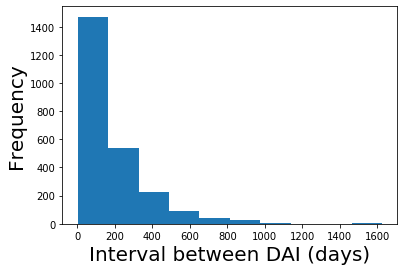

In [100]:
# Histogram of the initial response variable
g = Data_analyzed['Days Until Next Intervention'].hist()
g.set_xlabel('Interval between DAI (days)',fontsize=20);
g.set_ylabel('Frequency',fontsize=20);
g.grid(False)

plt.show()

In [101]:
# Log transformation of the response variable

Data_analyzed['Log_DAI'] = np.log(Data_analyzed['Days Until Next Intervention'])

C:\Users\eyita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


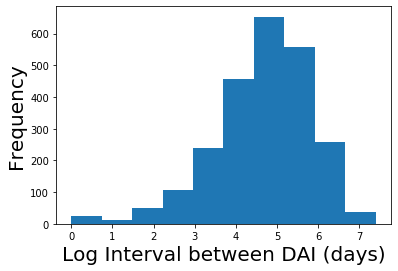

In [102]:
# Histogram of the log transformed response variable
g2 = Data_analyzed['Log_DAI'].hist()
g2.set_xlabel('Log Interval between DAI (days)',fontsize=20);
g2.set_ylabel('Frequency',fontsize=20);
g2.grid(False)

plt.show()

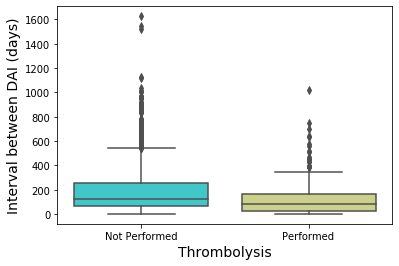

In [103]:
# Exploring differences in interval between DAI based off whether a procedure to fix blood clot was performed
h = sns.boxplot(x="Thrombolysis-94", y="Days Until Next Intervention", data=Data_analyzed,palette='rainbow')

h.set_xlabel('Thrombolysis',fontsize=14);
h.set_ylabel('Interval between DAI (days)',fontsize=14);
h.grid(False)

plt.show()

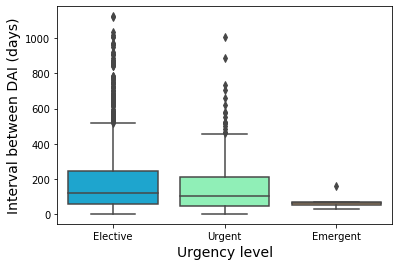

In [104]:
# Exploring differences in interval between DAI based on urgency of the initial procedure
k = sns.boxplot(x="Urgency-21", y="Days Until Next Intervention", data=Data_analyzed,palette='rainbow')
k.set_xlabel('Urgency level',fontsize=14);
k.set_ylabel('Interval between DAI (days)',fontsize=14);
k.grid(False)

plt.show()

*Other plots*

[Text(0, 0.5, 'Interval between dialysis access procedures (days)'),
 Text(0.5, 0, 'Site of Service')]

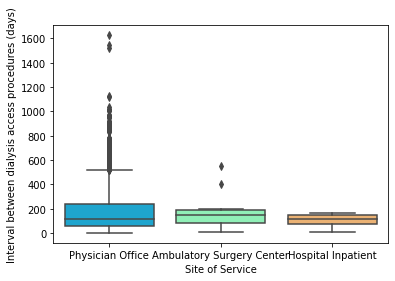

In [105]:
k = sns.boxplot(x="Site of Service-4", y="Days Until Next Intervention", data=Data_analyzed,palette='rainbow')
k.set(xlabel='Site of Service', ylabel='Interval between dialysis access procedures (days)')

In [106]:
Data_analyzed['Access Type-48'].value_counts()

AV Fistula    1710
AV Graft       595
Hero            36
Name: Access Type-48, dtype: int64

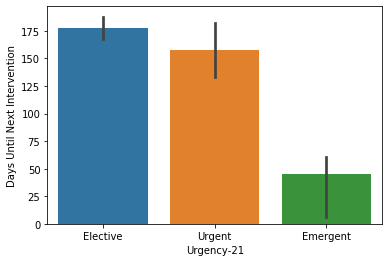

In [107]:
sns.barplot(x="Urgency-21", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)


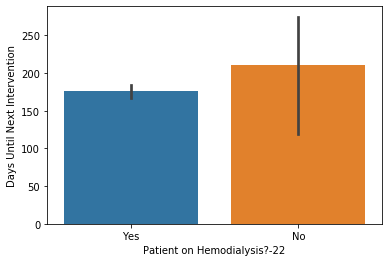

In [108]:
sns.barplot(x="Patient on Hemodialysis?-22", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

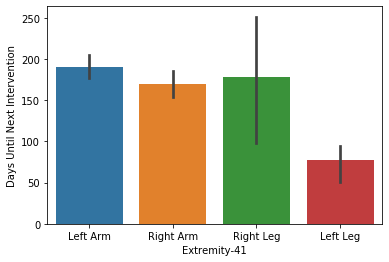

In [109]:
sns.barplot(x="Extremity-41", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

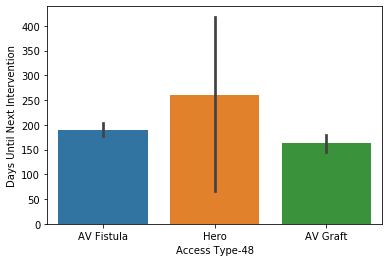

In [110]:
sns.barplot(x="Access Type-48", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

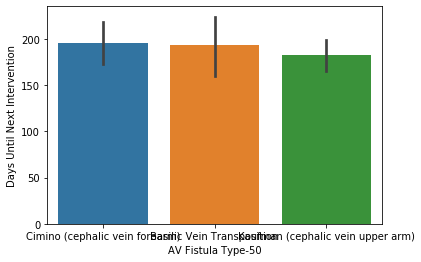

In [111]:
sns.barplot(x="AV Fistula Type-50", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

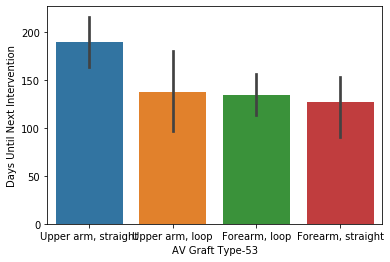

In [112]:
sns.barplot(x="AV Graft Type-53", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

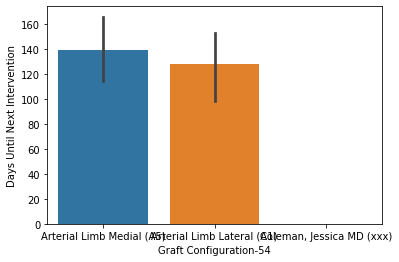

In [113]:
sns.barplot(x="Graft Configuration-54", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

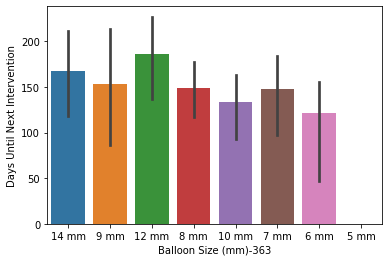

In [114]:
sns.barplot(x="Balloon Size (mm)-363", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

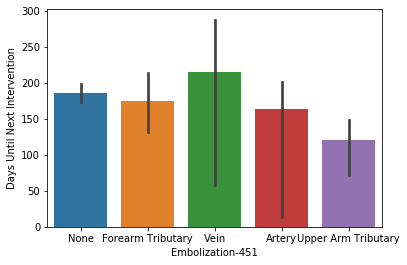

In [115]:
sns.barplot(x="Embolization-451", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

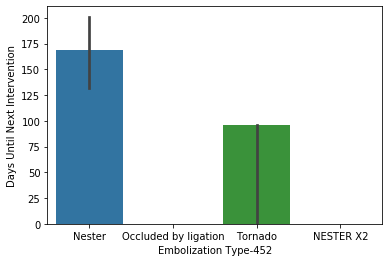

In [116]:
sns.barplot(x="Embolization Type-452", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

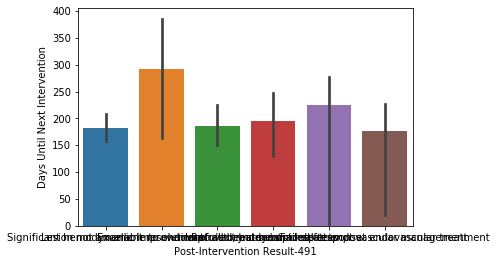

In [117]:
sns.barplot(x="Post-Intervention Result-491", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

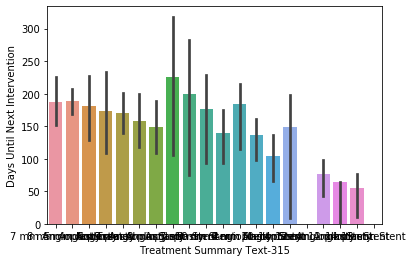

In [118]:
sns.barplot(x="Treatment Summary Text-315", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

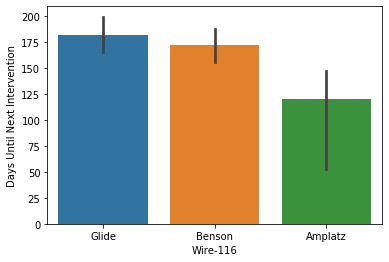

In [119]:
sns.barplot(x="Wire-116", y="Days Until Next Intervention", data=Data_analyzed,estimator=np.nanstd)

In [123]:
# Replacing NAs in categorical variables with None

for i in Categoricals:
   Data_analyzed[i].fillna('None', inplace = True)



In [124]:
Categoricals_df = Data_analyzed[Categoricals]

*Dealing with categorical variables using one hot encoding*

In [125]:
# Transforming the categorical variables
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
Final_df = pd.DataFrame(OH_encoder.fit_transform(Data_analyzed[Categoricals]))

In [126]:
# One-hot encoding removed index; put it back

Final_df.index = Data_analyzed.index

# Remove categorical columns (will replace with one-hot encoding)

num_X = Data_analyzed.drop(Categoricals, axis=1)

# Add one-hot encoded columns to numerical features

Final_df = pd.concat([num_X, Final_df], axis=1)

In [127]:
Final_df.head()

,Days Until Next Intervention,Days Since last access procedure,patient age in years-7,Follow up after Difficulty-10,Prolonged Bleeding-25,Swelling-26,Inadequate Clearance-27,Poor Arterial Inflow-28,Aneurysmal Degeneration-29,Pain-30,...,712,713,714,715,716,717,718,719,720,721
0,1626,NaN,NaN,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1543,NaN,NaN,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1520,NaN,NaN,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1125,NaN,NaN,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1121,NaN,NaN,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


*Dealing with missing values in numeric variables using simple imputer*

In [129]:
# Importing libraries needed
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
Final_df2 = pd.DataFrame(my_imputer.fit_transform(Final_df))


# Imputation removed column names; put them back
Final_df2.columns = Final_df.columns

In [130]:
Final_df2.head()

,Days Until Next Intervention,Days Since last access procedure,patient age in years-7,Follow up after Difficulty-10,Prolonged Bleeding-25,Swelling-26,Inadequate Clearance-27,Poor Arterial Inflow-28,Aneurysmal Degeneration-29,Pain-30,...,712,713,714,715,716,717,718,719,720,721
0,1626.0,108.420213,63.538605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1543.0,108.420213,63.538605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1520.0,108.420213,63.538605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1125.0,108.420213,63.538605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1121.0,108.420213,63.538605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [131]:
# Checking for any NAs left

K12 = Final_df2.isnull().sum().sort_values(ascending=False)
M12 = pd.DataFrame(K12, columns=['Number of NAs'])
M12.head()

,Number of NAs
721,0
196,0
194,0
193,0
192,0


In [132]:
#Eye-balling the final dataset
Final_df2.head()

,Days Until Next Intervention,Days Since last access procedure,patient age in years-7,Follow up after Difficulty-10,Prolonged Bleeding-25,Swelling-26,Inadequate Clearance-27,Poor Arterial Inflow-28,Aneurysmal Degeneration-29,Pain-30,...,712,713,714,715,716,717,718,719,720,721
0,1626.0,108.420213,63.538605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1543.0,108.420213,63.538605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1520.0,108.420213,63.538605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1125.0,108.420213,63.538605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1121.0,108.420213,63.538605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


*Random forest models for prediction*

In [133]:
# Splitting the data into predictor and response variables

Resp_var = ['Days Until Next Intervention', 'Log_DAI']

X1 = Final_df2.drop(Resp_var, axis=1)
y1 = Final_df2['Days Until Next Intervention']

In [134]:
# First we create a model using the response variable itself with Gridsearch and CV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50, random_state=0,))])

In [135]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X1, y1,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE:\n", list(scores))

MAE:
 [365.38362500000005, 68.27591666666667, 83.4785803757829, 133.3695198329854, 190.51106471816286]


*With very high mean absolute error values, using the log transformed values of the response variable is apt*

In [136]:
# Creating a new model using log transformed y values
X2 = Final_df2.drop(Resp_var, axis=1)
y2 = Final_df2['Log_DAI']

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline2 = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50, random_state=0,))])

In [138]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores2 = -1 * cross_val_score(my_pipeline2, X2, y2,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE:\n", list(scores2))

MAE:
 [1.7247180617630253, 0.827066985194228, 0.3650450636939085, 0.6456752654966255, 2.196363021288692]


In [139]:
# Getting the mean of the output, which are log values
log_vals = [1.7247180617630253, 0.827066985194228, 0.3650450636939085, 0.6456752654966255, 2.196363021288692]
np.mean(log_vals)

1.151773679487296

In [140]:
# Getting actual valuesin days by calculating exponentials of the log values
np.exp(1.151773679487296)

3.1637995023499723

In [348]:
Rsq_log = [25.67956271237327, 30.64096811128819, 7.8508931578656185, 13.857562489222175, 6.554667964233048]
np.mean(Rsq_log)

16.916730886996458

*With average mean absolute error of approximately 3 days, I think we have a decent model*

*Creating the final model with optimal parameters*

In [157]:
# Splitting the data set

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X2, y2, test_size=0.25)

In [158]:
# GridSearch to find the optimal model parameters
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [143]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  2.6min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [159]:
# Now the final model with optimal model parameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=90,
    min_samples_split = 10,
    min_samples_leaf = 3,
    max_features = 3,
    bootstrap=True)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_valid)
MAError = mean_absolute_error(y_valid, predictions)
print(np.exp(MAError))



2.5312965180907727


*Recreating the model using Extreme Gradient Boosting (XGB) ensemble method*

In [145]:
from xgboost import XGBRegressor

my_model2 = XGBRegressor(n_estimators=100)
my_model2.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

C:\Users\eyita\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:16:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [147]:
from sklearn.metrics import mean_absolute_error

predictions2 = my_model2.predict(X_valid)
print("Mean Absolute Error: " + str(np.exp(mean_absolute_error(predictions2, y_valid))))

Mean Absolute Error: 2.391375651434137


*Gradient boosting didn't perform any better than the Random Forest model*

*Obtaining feature importance values*

In [160]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances[0:10]

,importance
Fluoroscopy Time (min)-470,0.021984
186,0.018549
184,0.017530
176,0.016170
Days Since last access procedure,0.014474
183,0.012926
Fentanyl (µg)-81,0.011381
363,0.011360
tPA Dose (mg)-105,0.010853
Clotted Access-32,0.010276


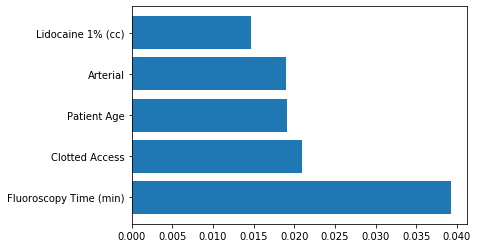

In [161]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# Make fake dataset
height = [0.039234, 0.021016, 0.019128, 0.018960, 0.014625]
bars = ('Fluoroscopy Time (min)', 'Clotted Access', 'Patient Age', 'Arterial', 'Lidocaine 1% (cc)')
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()


In [162]:
# Now I create a model for the top 5 most important variables in the model
Impotant_var = ['Fluoroscopy Time (min)-470', 'Clotted Access-32', 'patient age in years-7', 'Arterial-107',
         'Lidocaine 1% (w Epi) cc-69', 'Days Until Next Intervention', 'Log_DAI']
Demo_df = Final_df2[Impotant_var]

In [163]:
Demo_df.head()

,Fluoroscopy Time (min)-470,Clotted Access-32,patient age in years-7,Arterial-107,Lidocaine 1% (w Epi) cc-69,Days Until Next Intervention,Log_DAI
0,9.083795,0.0,63.538605,0.0,4.234783,1626.0,7.393878
1,1.000000,0.0,63.538605,0.0,4.234783,1543.0,7.341484
2,9.083795,0.0,63.538605,0.0,4.234783,1520.0,7.326466
3,2.000000,0.0,63.538605,0.0,4.234783,1125.0,7.025538
4,0.380000,0.0,63.538605,0.0,4.234783,1121.0,7.021976


In [164]:
# Changing column names
Demo_df.columns = ['Fluoroscopy_Time', 'Clotted_Access', 'Age',
                    'Arterial', 'Lidocaine', 'Days Until Next Intervention', 'Log_DAI']

In [165]:
Demo_df.head()

,Fluoroscopy_Time,Clotted_Access,Age,Arterial,Lidocaine,Days Until Next Intervention,Log_DAI
0,9.083795,0.0,63.538605,0.0,4.234783,1626.0,7.393878
1,1.000000,0.0,63.538605,0.0,4.234783,1543.0,7.341484
2,9.083795,0.0,63.538605,0.0,4.234783,1520.0,7.326466
3,2.000000,0.0,63.538605,0.0,4.234783,1125.0,7.025538
4,0.380000,0.0,63.538605,0.0,4.234783,1121.0,7.021976


In [166]:
Resp_var2 = ['Days Until Next Intervention', 'Log_DAI']

In [167]:
X3 = Demo_df.drop(Resp_var2, axis=1)
y3 = Demo_df['Log_DAI']

# Splitting the data set

from sklearn.model_selection import train_test_split

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X3, y3, test_size=0.25)

In [168]:
rf_model2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=100,
    min_samples_split = 8,
    min_samples_leaf = 3,
    max_features = 3,
    bootstrap=True)
rf_model2.fit(X_train2, y_train2)
predictions3 = rf_model2.predict(X_valid2)
MAError3 = mean_absolute_error(y_valid2, predictions3)
print(np.exp(MAError3))

2.478817011103273


In [169]:
# Saving the model as a joblib file

from sklearn.externals import joblib

C:\Users\eyita\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [170]:
filename = 'Rf_model.joblib'
joblib.dump(rf_model2, filename)

['Rf_model.joblib']

In [171]:
filename = 'Imputer2.joblib'
joblib.dump(my_imputer, filename)

['Imputer2.joblib']

In [ ]:
conda install -c conda-forge miktex
